# My Spotify streaming habits

Exploratory data analysis

# Table of contents
1. A brief introduction to online music streaming
2. Data preparation <br>
    2.1. Quick data overview <br>
    2.2. Check for unknown values and duplicates<br>
    2.3. Handle date and time types <br>
    2.4. Add the full stream logic <br>
    2.5. Change column order <br>
    2.6. Drop rows with podcasts <br>
3. Data description
4. Data analysis <br>
    4.1. Full streams by month and date <br>
    4.2. Full streams by day of the week and hour <br>
    4.3. Time spent streaming <br>
    4.4. Most streamed artists <br>
    4.5. Most streamed songs <br>
5. Key takeaways

## 1. A brief introduction to online music streaming

After 2006, Spotify and other streaming platforms became prominent players, dominating the world of music distribution. Today, online streaming accounts for 80% of the music industry's revenue.

Online music streaming platforms have also changed the way the songs are written. Artists receive royalties only when someone listens to at least 30 seconds of the song.

As a result, the songs get shorter and shorter and the long song intros are virtually gone. At the very beginning of the song, a chorus plays to capture the listener's attention. Skip rates can ruin a song or the artist's entire career.

Still, average listener attention continues to shrink.

## 2. Data preparation

A pre-processing step allowing for further data analysis

## 2.1. Quick data overview

In [1]:
# import Python libraries
import pandas as pd
import json
from datetime import datetime, date, time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# check the structure of the first file
df1 = pd.read_json('Raw Files/StreamingHistory0.json')
df1

,endTime,artistName,trackName,msPlayed
0,2020-02-20 11:02,Adam Lambert,Please Come Home For Christmas,177864
1,2020-02-20 11:06,Adam Lambert,Superpower - Wideboys Remix,253770
2,2020-02-20 11:10,Adam Lambert,Superpower - The Knocks Remix,221217
3,2020-02-20 11:13,Adam Lambert,Superpower (Acapella),191954
4,2020-02-20 11:14,Adam Lambert,Superpower,79114
...,...,...,...,...
9995,2020-08-26 09:45,Sabrina Claudio,Wanna Know,241588
9996,2020-08-26 09:49,Sabrina Claudio,Frozen,244909
9997,2020-08-26 09:52,Sabrina Claudio,We Have Time,199311
9998,2020-08-26 09:55,Sabrina Claudio,Used To,187009


In [3]:
# read the first rows from the first json file
df1.head()

,endTime,artistName,trackName,msPlayed
0,2020-02-20 11:02,Adam Lambert,Please Come Home For Christmas,177864
1,2020-02-20 11:06,Adam Lambert,Superpower - Wideboys Remix,253770
2,2020-02-20 11:10,Adam Lambert,Superpower - The Knocks Remix,221217
3,2020-02-20 11:13,Adam Lambert,Superpower (Acapella),191954
4,2020-02-20 11:14,Adam Lambert,Superpower,79114


In [4]:
# read the last rows from the first json file
df1.tail()

,endTime,artistName,trackName,msPlayed
9995,2020-08-26 09:45,Sabrina Claudio,Wanna Know,241588
9996,2020-08-26 09:49,Sabrina Claudio,Frozen,244909
9997,2020-08-26 09:52,Sabrina Claudio,We Have Time,199311
9998,2020-08-26 09:55,Sabrina Claudio,Used To,187009
9999,2020-08-26 09:58,Sabrina Claudio,Wait,182510


In [5]:
# check the structure of the second file
df2 = pd.read_json('Raw Files/StreamingHistory1.json')
df2

,endTime,artistName,trackName,msPlayed
0,2020-08-26 10:01,Sabrina Claudio,Belong to You (feat. 6LACK),185617
1,2020-08-26 13:59,Rainsford,Crying In The Mirror,189914
2,2020-08-26 14:02,Kristian Kostov,Beautiful Mess,180952
3,2020-08-26 14:06,Mahalia,Plastic Plants,199533
4,2020-08-26 14:10,LÉON,And It Breaks My Heart,246944
...,...,...,...,...
73,2020-08-29 16:40,Lord Echo,The Sweetest Meditation,354213
74,2020-08-29 16:46,Amber Mark,Conexão,299131
75,2020-08-29 16:49,Mahalia,Plastic Plants,199533
76,2020-08-29 16:52,Max Pope,Just Friends,186488


In [6]:
# read the first rows from the second json file
df2.head()

,endTime,artistName,trackName,msPlayed
0,2020-08-26 10:01,Sabrina Claudio,Belong to You (feat. 6LACK),185617
1,2020-08-26 13:59,Rainsford,Crying In The Mirror,189914
2,2020-08-26 14:02,Kristian Kostov,Beautiful Mess,180952
3,2020-08-26 14:06,Mahalia,Plastic Plants,199533
4,2020-08-26 14:10,LÉON,And It Breaks My Heart,246944


In [7]:
# read the last rows from the second json file
df2.tail()

,endTime,artistName,trackName,msPlayed
73,2020-08-29 16:40,Lord Echo,The Sweetest Meditation,354213
74,2020-08-29 16:46,Amber Mark,Conexão,299131
75,2020-08-29 16:49,Mahalia,Plastic Plants,199533
76,2020-08-29 16:52,Max Pope,Just Friends,186488
77,2020-08-29 16:56,upsidedownhead,twice as tough ft. Mansionair,213378


In [8]:
# combine two json files into one dataframe
df = df1.append(df2)
df

,endTime,artistName,trackName,msPlayed
0,2020-02-20 11:02,Adam Lambert,Please Come Home For Christmas,177864
1,2020-02-20 11:06,Adam Lambert,Superpower - Wideboys Remix,253770
2,2020-02-20 11:10,Adam Lambert,Superpower - The Knocks Remix,221217
3,2020-02-20 11:13,Adam Lambert,Superpower (Acapella),191954
4,2020-02-20 11:14,Adam Lambert,Superpower,79114
...,...,...,...,...
73,2020-08-29 16:40,Lord Echo,The Sweetest Meditation,354213
74,2020-08-29 16:46,Amber Mark,Conexão,299131
75,2020-08-29 16:49,Mahalia,Plastic Plants,199533
76,2020-08-29 16:52,Max Pope,Just Friends,186488


In [9]:
# change column names
df.rename(columns={'endTime':'time',
                    'artistName':'artist',
                    'trackName':'track',
                    'msPlayed':'ms'}, 
                     inplace=True)
df.head()

,time,artist,track,ms
0,2020-02-20 11:02,Adam Lambert,Please Come Home For Christmas,177864
1,2020-02-20 11:06,Adam Lambert,Superpower - Wideboys Remix,253770
2,2020-02-20 11:10,Adam Lambert,Superpower - The Knocks Remix,221217
3,2020-02-20 11:13,Adam Lambert,Superpower (Acapella),191954
4,2020-02-20 11:14,Adam Lambert,Superpower,79114


## 2.2. Check for unknown values and duplicates

In [10]:
# check whether unknown values are present in the dataset
df.isnull().sum()

time      0
artist    0
track     0
ms        0
dtype: int64

In [11]:
# check for duplicates
df.drop_duplicates()

,time,artist,track,ms
0,2020-02-20 11:02,Adam Lambert,Please Come Home For Christmas,177864
1,2020-02-20 11:06,Adam Lambert,Superpower - Wideboys Remix,253770
2,2020-02-20 11:10,Adam Lambert,Superpower - The Knocks Remix,221217
3,2020-02-20 11:13,Adam Lambert,Superpower (Acapella),191954
4,2020-02-20 11:14,Adam Lambert,Superpower,79114
...,...,...,...,...
73,2020-08-29 16:40,Lord Echo,The Sweetest Meditation,354213
74,2020-08-29 16:46,Amber Mark,Conexão,299131
75,2020-08-29 16:49,Mahalia,Plastic Plants,199533
76,2020-08-29 16:52,Max Pope,Just Friends,186488


## 2.3. Handle date and time types

In [12]:
# data start
min(df.time)

'2020-02-20 11:02'

In [13]:
# data end
max(df.time)

'2020-08-29 16:56'

In [14]:
# add data intervals: seconds, minutes, hours
# combine artist and a track title in one line (new 'content' column)
# add stream flag
df['seconds'] = df['ms']/1000
df['minutes'] = df['seconds']/60
df['hours'] = df['minutes']/60
df['content'] = df['track'] + ', ' + df['artist']
df['stream'] = 1
df.head()

,time,artist,track,ms,seconds,minutes,hours,content,stream
0,2020-02-20 11:02,Adam Lambert,Please Come Home For Christmas,177864,177.864,2.964400,0.049407,"Please Come Home For Christmas, Adam Lambert",1
1,2020-02-20 11:06,Adam Lambert,Superpower - Wideboys Remix,253770,253.770,4.229500,0.070492,"Superpower - Wideboys Remix, Adam Lambert",1
2,2020-02-20 11:10,Adam Lambert,Superpower - The Knocks Remix,221217,221.217,3.686950,0.061449,"Superpower - The Knocks Remix, Adam Lambert",1
3,2020-02-20 11:13,Adam Lambert,Superpower (Acapella),191954,191.954,3.199233,0.053321,"Superpower (Acapella), Adam Lambert",1
4,2020-02-20 11:14,Adam Lambert,Superpower,79114,79.114,1.318567,0.021976,"Superpower, Adam Lambert",1


In [15]:
# data conversion for datetime values
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['month'] = df['time'].dt.strftime('%Y-%m')
df['dayweek'] = df['time'].dt.strftime('%A')
df['am_or_pm'] = df['time'].dt.strftime('%p')
df['hour'] = df['time'].dt.hour
df.head()

,time,artist,track,ms,seconds,minutes,hours,content,stream,date,month,dayweek,am_or_pm,hour
0,2020-02-20 11:02:00,Adam Lambert,Please Come Home For Christmas,177864,177.864,2.964400,0.049407,"Please Come Home For Christmas, Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11
1,2020-02-20 11:06:00,Adam Lambert,Superpower - Wideboys Remix,253770,253.770,4.229500,0.070492,"Superpower - Wideboys Remix, Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11
2,2020-02-20 11:10:00,Adam Lambert,Superpower - The Knocks Remix,221217,221.217,3.686950,0.061449,"Superpower - The Knocks Remix, Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11
3,2020-02-20 11:13:00,Adam Lambert,Superpower (Acapella),191954,191.954,3.199233,0.053321,"Superpower (Acapella), Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11
4,2020-02-20 11:14:00,Adam Lambert,Superpower,79114,79.114,1.318567,0.021976,"Superpower, Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11


## 2.4. Add the full stream logic

In [16]:
# add the full stream flag
# a song has to be listened to for at least 30 seconds to generate revenue for its artist
df['full_stream'] = np.where(df['seconds'] >= 30, 1, 0)
df.head()

,time,artist,track,ms,seconds,minutes,hours,content,stream,date,month,dayweek,am_or_pm,hour,full_stream
0,2020-02-20 11:02:00,Adam Lambert,Please Come Home For Christmas,177864,177.864,2.964400,0.049407,"Please Come Home For Christmas, Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11,1
1,2020-02-20 11:06:00,Adam Lambert,Superpower - Wideboys Remix,253770,253.770,4.229500,0.070492,"Superpower - Wideboys Remix, Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11,1
2,2020-02-20 11:10:00,Adam Lambert,Superpower - The Knocks Remix,221217,221.217,3.686950,0.061449,"Superpower - The Knocks Remix, Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11,1
3,2020-02-20 11:13:00,Adam Lambert,Superpower (Acapella),191954,191.954,3.199233,0.053321,"Superpower (Acapella), Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11,1
4,2020-02-20 11:14:00,Adam Lambert,Superpower,79114,79.114,1.318567,0.021976,"Superpower, Adam Lambert",1,2020-02-20,2020-02,Thursday,AM,11,1


In [17]:
# check streams below 30 seconds
df.loc[df['seconds']< 30].head()

,time,artist,track,ms,seconds,minutes,hours,content,stream,date,month,dayweek,am_or_pm,hour,full_stream
100,2020-02-21 08:49:00,Celeste,Summer,5654,5.654,0.094233,0.001571,"Summer, Celeste",1,2020-02-21,2020-02,Friday,AM,8,0
115,2020-02-21 18:07:00,Nocturnal Spirits,Greene St,7418,7.418,0.123633,0.002061,"Greene St, Nocturnal Spirits",1,2020-02-21,2020-02,Friday,PM,18,0
116,2020-02-21 18:07:00,Nocturnal Spirits,Every Time Our Eyes Meet,3146,3.146,0.052433,0.000874,"Every Time Our Eyes Meet, Nocturnal Spirits",1,2020-02-21,2020-02,Friday,PM,18,0
117,2020-02-21 18:08:00,Lewis Capaldi,Bruises,24473,24.473,0.407883,0.006798,"Bruises, Lewis Capaldi",1,2020-02-21,2020-02,Friday,PM,18,0
118,2020-02-21 18:59:00,Lewis Capaldi,Bruises,7697,7.697,0.128283,0.002138,"Bruises, Lewis Capaldi",1,2020-02-21,2020-02,Friday,PM,18,0


## 2.5. Change column order

In [18]:
# change column order, drop unneccessary columns
df = df[['date','month','dayweek','hour','am_or_pm','artist','track','content','seconds','minutes','full_stream']]
df.head()

,date,month,dayweek,hour,am_or_pm,artist,track,content,seconds,minutes,full_stream
0,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Please Come Home For Christmas,"Please Come Home For Christmas, Adam Lambert",177.864,2.964400,1
1,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - Wideboys Remix,"Superpower - Wideboys Remix, Adam Lambert",253.770,4.229500,1
2,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - The Knocks Remix,"Superpower - The Knocks Remix, Adam Lambert",221.217,3.686950,1
3,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower (Acapella),"Superpower (Acapella), Adam Lambert",191.954,3.199233,1
4,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower,"Superpower, Adam Lambert",79.114,1.318567,1


## 2.6. Drop rows with podcasts

In [19]:
# filter out podcasts by selecting playbacks longer than 12 minutes
# cut-off of 12 was chosen through trial and error
df.loc[df['minutes']> 12].sort_values(by='minutes')

,date,month,dayweek,hour,am_or_pm,artist,track,content,seconds,minutes,full_stream
1378,2020-03-11,2020-03,Wednesday,19,PM,8:10,"Młodzież ubiera się u Prady, czyli ""How Much i...","Młodzież ubiera się u Prady, czyli ""How Much i...",1074.712,17.911867,1
5450,2020-05-29,2020-05,Friday,11,AM,Harry Potter At Home: Readings – Harry Potter ...,"8. Alia Bhatt, with Alec Baldwin and his daugt...","8. Alia Bhatt, with Alec Baldwin and his daugt...",1116.409,18.606817,1
6421,2020-06-11,2020-06,Thursday,21,PM,Harry Potter At Home: Readings – Harry Potter ...,"11. David Tennant, with David Beckham, reads C...","11. David Tennant, with David Beckham, reads C...",1144.743,19.079050,1
1386,2020-03-12,2020-03,Thursday,12,PM,8:10,Pilecki z twarzą Dudy. Sztuka (polskich) mural...,Pilecki z twarzą Dudy. Sztuka (polskich) mural...,1271.797,21.196617,1
8020,2020-07-08,2020-07,Wednesday,11,AM,Harry Potter At Home: Readings – Harry Potter ...,13. Hugh Bonneville reads Chapter Thirteen: ‘N...,13. Hugh Bonneville reads Chapter Thirteen: ‘N...,1382.045,23.034083,1
1376,2020-03-11,2020-03,Wednesday,19,PM,8:10,Napiwku nie będzie. Jak poniżamy kelnerów,"Napiwku nie będzie. Jak poniżamy kelnerów , 8:10",1457.737,24.295617,1
4382,2020-05-12,2020-05,Tuesday,12,PM,8:10,Jutronauci 2020: jak pandemia może zmienić Hol...,Jutronauci 2020: jak pandemia może zmienić Hol...,1516.216,25.270267,1
1470,2020-03-13,2020-03,Friday,11,AM,8:10,Mamut z Ćmielowa za 3900 zł?,"Mamut z Ćmielowa za 3900 zł?, 8:10",1516.591,25.276517,1
4276,2020-05-10,2020-05,Sunday,15,PM,Harry Potter At Home: Readings – Harry Potter ...,1. Daniel Radcliffe reads Chapter One: ‘The Bo...,1. Daniel Radcliffe reads Chapter One: ‘The Bo...,1554.863,25.914383,1
8124,2020-07-10,2020-07,Friday,10,AM,Harry Potter At Home: Readings – Harry Potter ...,"14. Jason Isaacs, Tom Felton and Helen McCrory...","14. Jason Isaacs, Tom Felton and Helen McCrory...",1566.708,26.111800,1


In [20]:
# delete podcasts from the dataframe
dfnopodcasts = df.copy()
dfnopodcasts.drop(dfnopodcasts.loc[dfnopodcasts['minutes']> 12].index, inplace=True)
dfnopodcasts

,date,month,dayweek,hour,am_or_pm,artist,track,content,seconds,minutes,full_stream
0,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Please Come Home For Christmas,"Please Come Home For Christmas, Adam Lambert",177.864,2.964400,1
1,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - Wideboys Remix,"Superpower - Wideboys Remix, Adam Lambert",253.770,4.229500,1
2,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - The Knocks Remix,"Superpower - The Knocks Remix, Adam Lambert",221.217,3.686950,1
3,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower (Acapella),"Superpower (Acapella), Adam Lambert",191.954,3.199233,1
4,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower,"Superpower, Adam Lambert",79.114,1.318567,1
...,...,...,...,...,...,...,...,...,...,...,...
73,2020-08-29,2020-08,Saturday,16,PM,Lord Echo,The Sweetest Meditation,"The Sweetest Meditation, Lord Echo",354.213,5.903550,1
74,2020-08-29,2020-08,Saturday,16,PM,Amber Mark,Conexão,"Conexão, Amber Mark",299.131,4.985517,1
75,2020-08-29,2020-08,Saturday,16,PM,Mahalia,Plastic Plants,"Plastic Plants, Mahalia",199.533,3.325550,1
76,2020-08-29,2020-08,Saturday,16,PM,Max Pope,Just Friends,"Just Friends, Max Pope",186.488,3.108133,1


In [21]:
# delete streams of less than 30 seconds from the dataframe
dffs = dfnopodcasts.copy()
dffs.drop(dffs.loc[dffs['full_stream'] == 0].index, inplace=True)
dffs

,date,month,dayweek,hour,am_or_pm,artist,track,content,seconds,minutes,full_stream
0,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Please Come Home For Christmas,"Please Come Home For Christmas, Adam Lambert",177.864,2.964400,1
1,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - Wideboys Remix,"Superpower - Wideboys Remix, Adam Lambert",253.770,4.229500,1
2,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - The Knocks Remix,"Superpower - The Knocks Remix, Adam Lambert",221.217,3.686950,1
3,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower (Acapella),"Superpower (Acapella), Adam Lambert",191.954,3.199233,1
4,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower,"Superpower, Adam Lambert",79.114,1.318567,1
...,...,...,...,...,...,...,...,...,...,...,...
73,2020-08-29,2020-08,Saturday,16,PM,Lord Echo,The Sweetest Meditation,"The Sweetest Meditation, Lord Echo",354.213,5.903550,1
74,2020-08-29,2020-08,Saturday,16,PM,Amber Mark,Conexão,"Conexão, Amber Mark",299.131,4.985517,1
75,2020-08-29,2020-08,Saturday,16,PM,Mahalia,Plastic Plants,"Plastic Plants, Mahalia",199.533,3.325550,1
76,2020-08-29,2020-08,Saturday,16,PM,Max Pope,Just Friends,"Just Friends, Max Pope",186.488,3.108133,1


## 3. Data description

Spotify allows its users to export their personal data. You can download your a copy of your streaming history following the instruction from the Spotify Support website:

<i>'You can get a ZIP file with a copy of most of your personal data by using the automated Download your data function on the Privacy Settings section of your account page. The download will include information about your playlists, streaming history, searches, a list of items saved in Your Library, the number of followers you have, the number of accounts you follow, the names of the artists you follow, and your payment and subscription data.'</i> 

The 'StreamingHistory0.json' and 'StreamingHistory1.json' files contain my streaming history between February 20, 2020 and August 29, 2020.

In [22]:
dffs

,date,month,dayweek,hour,am_or_pm,artist,track,content,seconds,minutes,full_stream
0,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Please Come Home For Christmas,"Please Come Home For Christmas, Adam Lambert",177.864,2.964400,1
1,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - Wideboys Remix,"Superpower - Wideboys Remix, Adam Lambert",253.770,4.229500,1
2,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - The Knocks Remix,"Superpower - The Knocks Remix, Adam Lambert",221.217,3.686950,1
3,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower (Acapella),"Superpower (Acapella), Adam Lambert",191.954,3.199233,1
4,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower,"Superpower, Adam Lambert",79.114,1.318567,1
...,...,...,...,...,...,...,...,...,...,...,...
73,2020-08-29,2020-08,Saturday,16,PM,Lord Echo,The Sweetest Meditation,"The Sweetest Meditation, Lord Echo",354.213,5.903550,1
74,2020-08-29,2020-08,Saturday,16,PM,Amber Mark,Conexão,"Conexão, Amber Mark",299.131,4.985517,1
75,2020-08-29,2020-08,Saturday,16,PM,Mahalia,Plastic Plants,"Plastic Plants, Mahalia",199.533,3.325550,1
76,2020-08-29,2020-08,Saturday,16,PM,Max Pope,Just Friends,"Just Friends, Max Pope",186.488,3.108133,1


In [23]:
dffs.head()

,date,month,dayweek,hour,am_or_pm,artist,track,content,seconds,minutes,full_stream
0,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Please Come Home For Christmas,"Please Come Home For Christmas, Adam Lambert",177.864,2.964400,1
1,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - Wideboys Remix,"Superpower - Wideboys Remix, Adam Lambert",253.770,4.229500,1
2,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower - The Knocks Remix,"Superpower - The Knocks Remix, Adam Lambert",221.217,3.686950,1
3,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower (Acapella),"Superpower (Acapella), Adam Lambert",191.954,3.199233,1
4,2020-02-20,2020-02,Thursday,11,AM,Adam Lambert,Superpower,"Superpower, Adam Lambert",79.114,1.318567,1


Each row of 9,235 observations represents a single full stream.

Categorical:
- <b> date </b> (In YYYYMMDD format)
- <b> month </b> (In YYYYM format)
- <b> dayweek </b> (Day of week)
- <b> hour </b> (In HH format)
- <b> am_or_pm </b> (Range from AM to PM)
- <b> artist </b> (Name of the artist)
- <b> track </b> (Name of the song)
- <b> content </b> (Name of the song and artist combined)

Numerical:
- <b> seconds </b> (Stream length in seconds)
- <b> minutes </b> (Stream length in minutes)
- <b> full_stream </b> (Equal to 1 for all rows)

## 4. Data analysis
A deep dive into the data

In [24]:
# display basic statistics for the data set
dffs.describe()

,hour,seconds,minutes,full_stream
count,9235.000000,9235.000000,9235.000000,9235.0
mean,12.319437,200.219119,3.336985,1.0
std,3.241384,56.498272,0.941638,0.0
min,4.000000,30.341000,0.505683,1.0
25%,10.000000,176.840000,2.947333,1.0
50%,12.000000,200.040000,3.334000,1.0
75%,15.000000,226.026000,3.767100,1.0
max,21.000000,672.520000,11.208667,1.0


## 4.1. Full streams by month and date

### Full streams by month

In [25]:
# Full streams by month
streamsbymonth = dffs.groupby(dffs['month'])['full_stream']
streamsbymonth.sum()

month
2020-02     644
2020-03    1423
2020-04    1455
2020-05    1490
2020-06    1951
2020-07    1017
2020-08    1255
Name: full_stream, dtype: int64

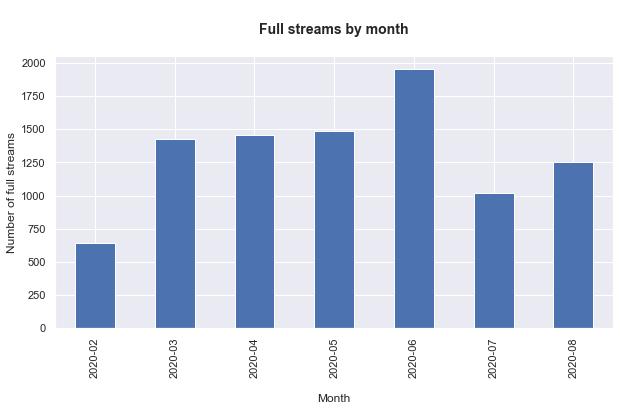

In [26]:
# June 2020 was the month with the highest number of full streams (1,951)
sns.set()
streamsbymonth.sum().plot.bar(figsize=(10,5), fontsize = 11)
plt.title('\nFull streams by month\n', fontsize=14, fontweight='bold')
plt.xlabel('\nMonth', fontsize=12)
plt.ylabel('Number of full streams', fontsize=12)
plt.show()

In [27]:
# Full streams by day in June
streamsjune = dffs.loc[dffs['month'] == '2020-06']
streamsjuneday = streamsjune.groupby(streamsjune['date'])['full_stream']
streamsjuneday.sum()

date
2020-06-01     97
2020-06-02     62
2020-06-03    110
2020-06-04    102
2020-06-05     88
2020-06-06     52
2020-06-07     75
2020-06-08     49
2020-06-09    101
2020-06-10     57
2020-06-11     37
2020-06-12     34
2020-06-13      8
2020-06-14     41
2020-06-15     98
2020-06-16    105
2020-06-17    113
2020-06-18    142
2020-06-19    101
2020-06-20     29
2020-06-21      4
2020-06-22    114
2020-06-23     35
2020-06-24     20
2020-06-25      3
2020-06-26     64
2020-06-27      7
2020-06-28     10
2020-06-29     70
2020-06-30    123
Name: full_stream, dtype: int64

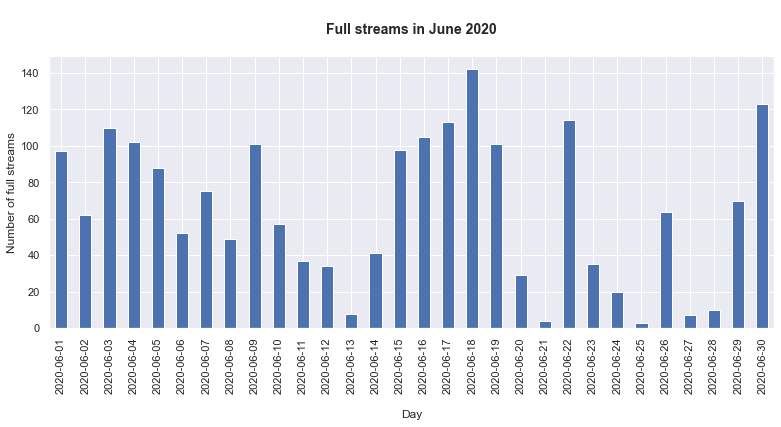

In [28]:
# June 18, 2020 was the day with the highest number of full streams (142) in the month of June
streamsjuneday.sum().plot.bar(figsize=(13,5), fontsize = 11)
plt.title('\nFull streams in June 2020\n', fontsize=14, fontweight='bold')
plt.xlabel('\nDay', fontsize=12)
plt.ylabel('Number of full streams', fontsize=12)
plt.show()

In [29]:
# Minutes of full streams by date in June
streamsjunemin = streamsjune.groupby(streamsjune['date'])['minutes']
streamsjunemin.sum()

date
2020-06-01    324.453750
2020-06-02    186.868217
2020-06-03    331.994000
2020-06-04    312.862483
2020-06-05    272.424300
2020-06-06    151.606000
2020-06-07    236.268100
2020-06-08    154.796700
2020-06-09    328.734983
2020-06-10    197.888450
2020-06-11    118.589100
2020-06-12    123.453000
2020-06-13     33.788967
2020-06-14    161.654383
2020-06-15    344.156133
2020-06-16    346.203483
2020-06-17    361.805750
2020-06-18    482.653017
2020-06-19    362.226733
2020-06-20    106.193983
2020-06-21     12.816700
2020-06-22    394.482433
2020-06-23    106.113633
2020-06-24     66.910167
2020-06-25      8.788133
2020-06-26    220.668500
2020-06-27     28.387350
2020-06-28     36.087167
2020-06-29    238.280950
2020-06-30    384.093300
Name: minutes, dtype: float64

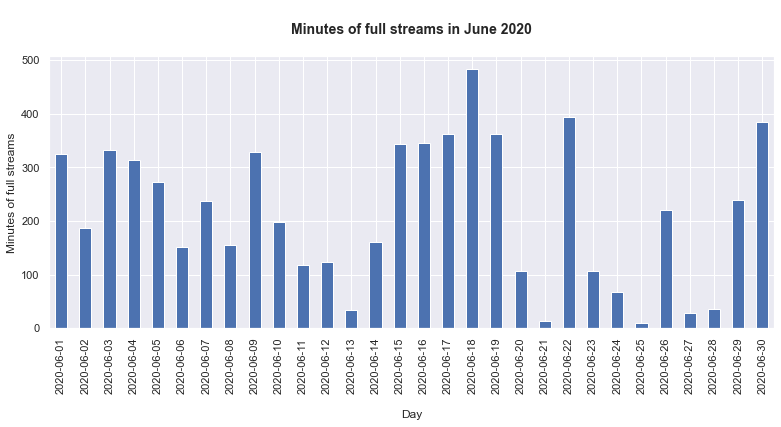

In [30]:
# June 18, 2020 was the day with the longest time spent on streaming in the month of June (483 minutes)
streamsjunemin.sum().plot.bar(figsize=(13,5), fontsize = 11)
plt.title('\nMinutes of full streams in June 2020\n', fontsize=14, fontweight='bold')
plt.xlabel('\nDay', fontsize=12)
plt.ylabel('Minutes of full streams', fontsize=12)
plt.show()

### Full streams by date

In [31]:
# Overall, April 29 was the day with the highest number of full streams (156)
dffs.groupby(dffs['date'])['full_stream'].sum().sort_values(ascending=False)

date
2020-04-29    156
2020-06-18    142
2020-05-05    123
2020-06-30    123
2020-08-12    118
             ... 
2020-06-25      3
2020-07-28      3
2020-07-18      3
2020-07-19      3
2020-03-29      1
Name: full_stream, Length: 187, dtype: int64

## 4.2. Full streams by day of the week and hour

### Full streams by day of the week

In [32]:
# Full streams by day of the week
dffs['dayweek'].value_counts()

Wednesday    1752
Tuesday      1593
Monday       1429
Thursday     1411
Friday       1222
Sunday        956
Saturday      872
Name: dayweek, dtype: int64

In [33]:
# Full streams by day of the week in pcts
# 52% of all full streams between Monday and Wednesday
round(dffs['dayweek'].value_counts() * 100 / dffs['dayweek'].value_counts().sum(),2)

Wednesday    18.97
Tuesday      17.25
Monday       15.47
Thursday     15.28
Friday       13.23
Sunday       10.35
Saturday      9.44
Name: dayweek, dtype: float64

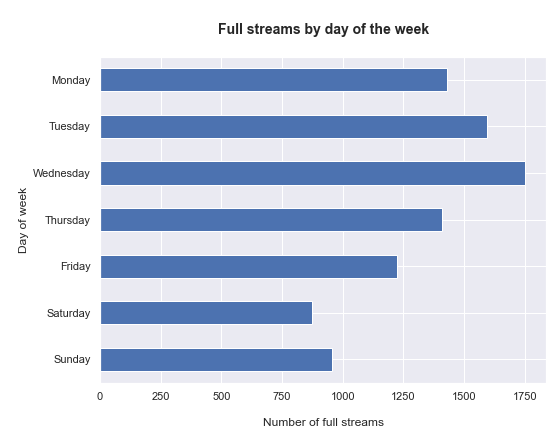

In [34]:
# Wednesday was the day with the highest number of streams
dffs['dayweek'].value_counts().loc[['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']].plot.barh(figsize=(8,6), fontsize = 11)
plt.title('\nFull streams by day of the week\n', fontsize=14, fontweight='bold')
plt.xlabel('\nNumber of full streams', fontsize=12)
plt.ylabel('\nDay of week', fontsize=12)
plt.show()

### Full streams by hour

In [35]:
# Full streams by hour
streamsbyhour = dffs.groupby(dffs['hour'])['full_stream']
streamsbyhour.sum()

hour
4        6
5       60
6      225
7      131
8      688
9      878
10     915
11    1127
12     979
13     953
14     861
15     616
16     587
17     633
18     355
19     169
20      51
21       1
Name: full_stream, dtype: int64

In [36]:
# 33% of all full streams took place between 11AM and 2PM
# Full streams by hour in pcts
round(dffs['hour'].value_counts() * 100 / dffs['hour'].value_counts().sum(),2)

11    12.20
12    10.60
13    10.32
10     9.91
9      9.51
14     9.32
8      7.45
17     6.85
15     6.67
16     6.36
18     3.84
6      2.44
19     1.83
7      1.42
5      0.65
20     0.55
4      0.06
21     0.01
Name: hour, dtype: float64

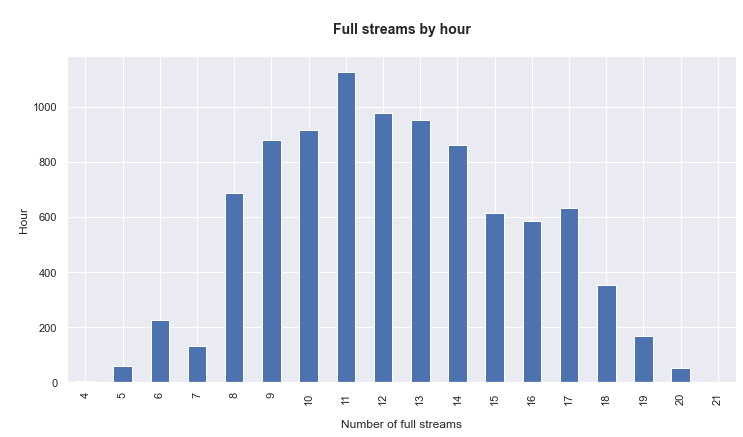

In [37]:
streamsbyhour.sum().plot.bar(figsize=(12,6), fontsize = 11)
plt.title('\nFull streams by hour\n', fontsize=14, fontweight='bold')
plt.xlabel('\nNumber of full streams', fontsize=12)
plt.ylabel('\nHour', fontsize=12)
plt.show()

## 4.3. Time spent streaming

In [38]:
max(dffs['date'])- min(dffs['date'])

datetime.timedelta(days=191)

In [39]:
# number of distinct days with streams: 187 days
dffs['date'].nunique()

187

In [40]:
# time spent streaming music: 30,8170 minutes
round(dffs['minutes'].sum(),2)

30817.06

In [41]:
# time spent streaming music: 513 hours
round(dffs['minutes'].sum()/60,2)

513.62

In [42]:
# time spent streaming music: over 21 days
round(dffs['minutes'].sum()/(24*60),2)

21.4

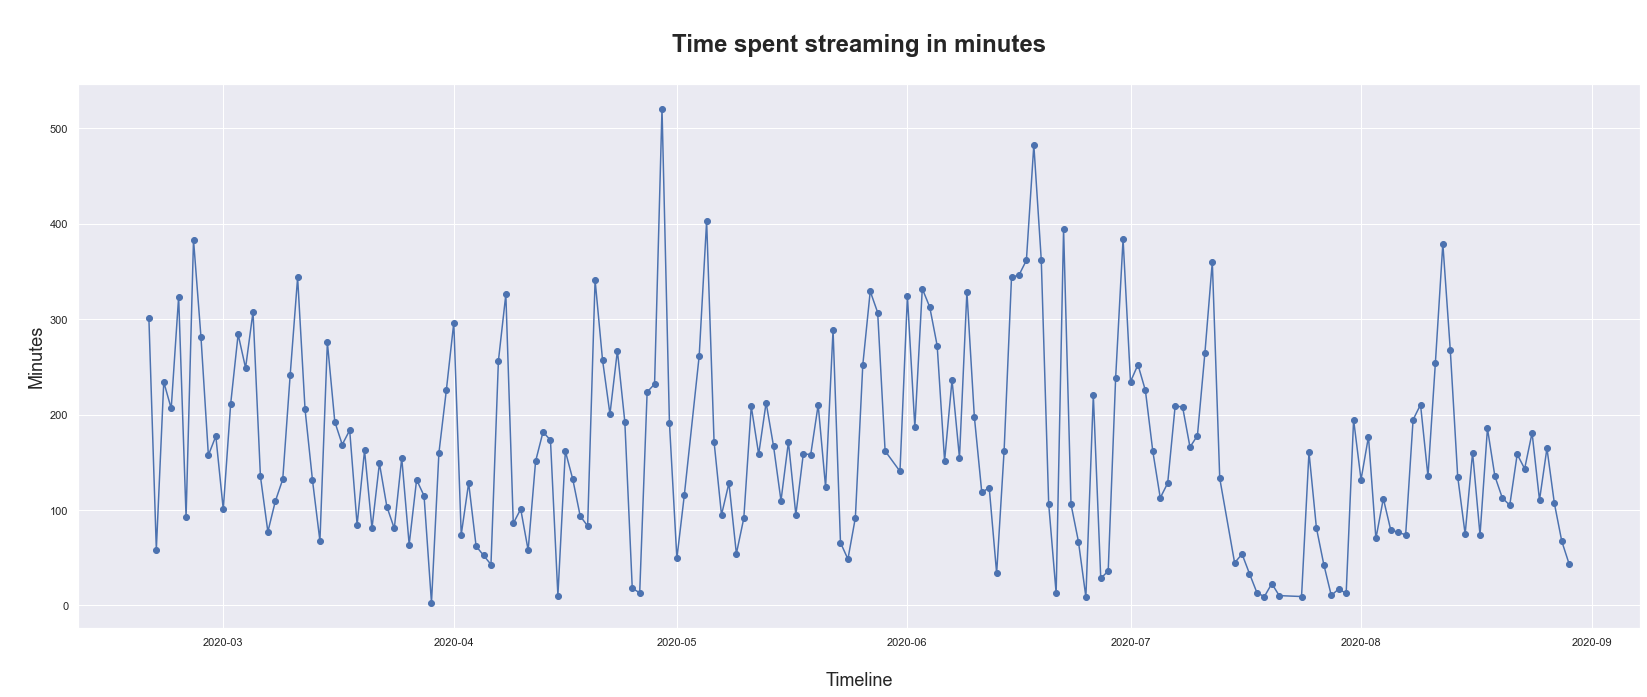

In [43]:
timebydate = dffs.groupby(dffs['date'])['minutes']
timebydate.sum().plot(figsize=(28,10), marker='o', fontsize = 11)
plt.title('\nTime spent streaming in minutes\n', fontsize=24, fontweight='bold')
plt.xlabel('\nTimeline', fontsize=18)
plt.ylabel('\nMinutes', fontsize=18)
plt.show()

In [44]:
# average total full stream duration per day of 165 minutes
round((dffs['minutes'].sum())/dffs['date'].nunique(),2)

164.8

In [45]:
# average number of full streams per day: 49
round(dffs['full_stream'].sum()/dffs['date'].nunique(),2)

49.39

## 4.4. Most streamed artists

In [46]:
# total number of unique artists
dffs['artist'].nunique()

1195

In [47]:
# the shortest stream was a song by Dermot Kennedy
dffs.loc[dffs['seconds'] == dffs['seconds'].min()]

,date,month,dayweek,hour,am_or_pm,artist,track,content,seconds,minutes,full_stream
1237,2020-03-10,2020-03,Tuesday,13,PM,Dermot Kennedy,The Corner,"The Corner, Dermot Kennedy",30.341,0.505683,1


In [48]:
# the longest stream was a song by Matthew Halsall
dffs.loc[dffs['seconds'] == dffs['seconds'].max()]

,date,month,dayweek,hour,am_or_pm,artist,track,content,seconds,minutes,full_stream
5642,2020-06-02,2020-06,Tuesday,8,AM,Matthew Halsall,Together,"Together, Matthew Halsall",672.52,11.208667,1


### Top artists

In [49]:
# display 20 most streamed artists
top20artists = dffs['artist'].value_counts().head(20)
top20artists

Celeste              222
Ego Ella May         199
Anna of the North    189
The Weeknd           186
HAIM                 155
Jazz & Coffee        154
LÉON                 148
Jessie Ware          144
Samm Henshaw         131
Jorja Smith          125
Freya Ridings        121
Halsey               117
Amber Mark           111
Sabrina Claudio      107
Max Pope             107
Lianne La Havas      103
Tame Impala           96
Khushi                91
Mahalia               89
Daniel Pemberton      87
Name: artist, dtype: int64

In [50]:
dffs.pivot_table(['full_stream'], aggfunc='sum', index=['artist']).sort_values(by = 'full_stream', ascending=False).head(20)

,full_stream
artist,
Celeste,222
Ego Ella May,199
Anna of the North,189
The Weeknd,186
HAIM,155
Jazz & Coffee,154
LÉON,148
Jessie Ware,144
Samm Henshaw,131


In [51]:
# the most streamed artists were Celeste with 222 full streams and 776 minutes, Ego Ella May with 199 full streams and 686 minutes and Anna of the North with 189 full streams and 606 minutes
dffs.groupby(['artist']).sum().sort_values(by = 'full_stream', ascending=False).head(20)

,hour,seconds,minutes,full_stream
artist,,,,
Celeste,2816,46538.391,775.639850,222
Ego Ella May,2489,41182.253,686.370883,199
Anna of the North,2152,36350.758,605.845967,189
The Weeknd,2422,39329.173,655.486217,186
HAIM,2070,30082.667,501.377783,155
Jazz & Coffee,1867,20649.416,344.156933,154
LÉON,1836,31653.674,527.561233,148
Jessie Ware,1899,34782.086,579.701433,144
Samm Henshaw,1552,30520.393,508.673217,131


### Top 3 artists per  month

In [52]:
# create a new dataframe to select top three artists for each month
dffsa = dffs.copy()
dffsa = dffsa[['month','artist','full_stream']]
dffsa.head(6)

,month,artist,full_stream
0,2020-02,Adam Lambert,1
1,2020-02,Adam Lambert,1
2,2020-02,Adam Lambert,1
3,2020-02,Adam Lambert,1
4,2020-02,Adam Lambert,1
5,2020-02,Amber Mark,1


In [53]:
# count the number of full streams for each month and each artist
streams_aggartist = dffsa.groupby(['month', 'artist']).agg({'full_stream':'sum'}).reset_index()
streams_aggartist

,month,artist,full_stream
0,2020-02,A$AP Rocky,1
1,2020-02,Aazar,1
2,2020-02,Adam Lambert,11
3,2020-02,Afrojack,1
4,2020-02,Alice Russell,2
...,...,...,...
2214,2020-08,ilselena,6
2215,2020-08,ionnalee,1
2216,2020-08,nimino,2
2217,2020-08,shiv,1


In [54]:
# for each month, sort the artists by the number of full streams in descending order
streams_sorted_artist = streams_aggartist.groupby(['month']).apply(lambda x: x.sort_values(['full_stream'],ascending = False)).reset_index(drop = True)

In [55]:
# pick the top 3 artists for each month
# the #1 streamed artist was Celeste in February and March, Halsey in April, Anna of the North in May, Jazz & Coffee in June, Ego Ella May in July and Sabrina Claudio in August
streams_sorted_artist.groupby(['month']).head(3)

,month,artist,full_stream
0,2020-02,Celeste,51
1,2020-02,Jorja Smith,40
2,2020-02,SAINt JHN,26
207,2020-03,Celeste,89
208,2020-03,The Weeknd,62
209,2020-03,Freya Ridings,59
574,2020-04,Halsey,81
575,2020-04,The Weeknd,68
576,2020-04,Anna of the North,51
875,2020-05,Anna of the North,82


## 4.5. Most streamed songs

### Top songs

In [56]:
# total number of unique songs
dffs['track'].nunique()

2526

In [57]:
# display 20 most streamed songs
top20songs = dffs['track'].value_counts().head(20)
top20songs

Just Friends                             75
Roses - Imanbek Remix                    72
From Me                                  70
Bittersweet                              70
Castles                                  64
Only One to Blame                        64
How Long 'Til We're Home                 62
Beautiful Mess                           60
Big Spoon                                59
Spotlight - Single Edit                  59
Scared To Live                           59
Nu Vreau                                 58
Let Her Know                             56
My Love                                  54
Walk On Water                            53
Something About You (with Rudimental)    52
Delete Forever                           50
Lately                                   48
Almost (Sweet Music)                     46
Stars                                    46
Name: track, dtype: int64

In [58]:
# the most streamed songs included 'Just Friends' by Max Pope with 75 full streams, 'Roses-IManbek Remix' by SAINt JHN with 72 full streams, 'Bittersweet' by Lianne La Havas and 'From Me' by Khushi with 70 full streams 
dffs.groupby(['content']).sum().sort_values(by = 'full_stream', ascending=False).head(20)

,hour,seconds,minutes,full_stream
content,,,,
"Just Friends, Max Pope",930,13233.777,220.562950,75
"Roses - Imanbek Remix, SAINt JHN",921,12656.400,210.940000,72
"Bittersweet, Lianne La Havas",834,15662.411,261.040183,70
"From Me, Khushi",838,14963.900,249.398333,70
"Only One to Blame, Samm Henshaw",743,17569.004,292.816733,64
"Castles, Freya Ridings",816,12821.643,213.694050,64
"How Long 'Til We're Home, Ego Ella May",784,12641.123,210.685383,62
"Beautiful Mess, Kristian Kostov",717,10671.921,177.865350,60
"Spotlight - Single Edit, Jessie Ware",744,13925.693,232.094883,59


### Top 3 songs per  month

In [59]:
# create a new dataframe to select top three songs for each month
dffss = dffs.copy()
dffss = dffss[['month','content','full_stream']]
dffss.head(6)

,month,content,full_stream
0,2020-02,"Please Come Home For Christmas, Adam Lambert",1
1,2020-02,"Superpower - Wideboys Remix, Adam Lambert",1
2,2020-02,"Superpower - The Knocks Remix, Adam Lambert",1
3,2020-02,"Superpower (Acapella), Adam Lambert",1
4,2020-02,"Superpower, Adam Lambert",1
5,2020-02,"Regret, Amber Mark",1


In [60]:
# count the number of full streams for each month and each song
streams_aggsong = dffss.groupby(['month', 'content']).agg({'full_stream':'sum'}).reset_index()
streams_aggsong

,month,content,full_stream
0,2020-02,"'Till I Met Thee - Radio Edit, Cody Chesnutt",1
1,2020-02,"10,000 Hours (with Justin Bieber), Dan + Shay",1
2,2020-02,"3 Nights, Dominic Fike",1
3,2020-02,"3am, Halsey",1
4,2020-02,"6 Days - MalYar & Beat Boy Remix, Mahmut Orhan",2
...,...,...,...
3955,2020-08,"two nights (feat. Aminé), Lykke Li",1
3956,2020-08,when the party's over - Recorded at Spotify St...,1
3957,2020-08,"you should see me in a crown, Billie Eilish",2
3958,2020-08,"Łańcuch I: Kiosk, Taco Hemingway",1


In [61]:
# pick the top 3 songs for each month
# for each month, sort the songs by the number of full streams in descending order
streams_sorted_song = streams_aggsong.groupby(['month']).apply(lambda x: x.sort_values(['full_stream'],ascending = False)).reset_index(drop = True)
streams_sorted_song.groupby(['month']).head(3)

,month,content,full_stream
0,2020-02,"Roses - Imanbek Remix, SAINt JHN",26
1,2020-02,"Lately, Celeste",11
2,2020-02,"To Die For, Sam Smith",10
389,2020-03,"Castles, Freya Ridings",33
390,2020-03,"Almost (Sweet Music), Hozier",26
391,2020-03,"Roses - Imanbek Remix, SAINt JHN",23
1064,2020-04,"From Me, Khushi",34
1065,2020-04,"Scared To Live, The Weeknd",32
1066,2020-04,"Let Her Know, Jontha Links",29
1627,2020-05,"Big Spoon, Roof",29


## 5. Key takeaways

- <b>Full streams by month and date</b>

June 2020 was the month with the highest number of full streams (1,951). 

April 29 was the day with the highest number of full streams (156), followed by June 18, 2020 (142 full streams) and May 5 (123 full streams).

- <b>Full streams by day of the week and hour </b>

52% of all full streams were between Monday and Wednesday. I was most likely to stream music on Wednesdays (18.97% of all full streams), Tuesdays (17.25 % of all full streams) and Mondays (15.47% of all full streams).

33% of all full streams took place between 11AM and 2PM.

- <b>Time spent streaming</b>

I spent 513 hours streaming music, which is over 21 days. This means that I streamed music for an average of 165 minutes every day.

- <b>Most streamed artists</b>

The most streamed artists were Celeste with 222 full streams and 776 minutes, Ego Ella May with 199 full streams and 686 minutes and Anna of the North with 189 full streams and 606 minutes.

The most popular artists were Celeste in February and March, Halsey in April, Anna of the North in May, Jazz & Coffee in June, Ego Ella May in July and Sabrina Claudio in August.

- <b>Most streamed songs</b>

The most streamed songs included 'Just Friends' by Max Pope with 75 full streams, 'Roses-IManbek Remix' by SAINt JHN with 72 full streams, 'Bittersweet' by Lianne La Havas, and 'From Me' by Khushi with 70 full streams.